<a href="https://colab.research.google.com/github/diamondmangrum/UQ-Bio2022/blob/main/Module_2_1_A_Basic_Probability_and_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src= https://raw.githubusercontent.com/MunskyGroup/uqbio2022/master/files/files_statistics/Module_2_1_Ania/Slide1.png alt="drawing" width="1000"/>

<!-- ----------
## Learning Objectives for this Notebook:
--------------

After completing this notebook, students should:
*   Be familiar with the basic meaning of random variables and their probability distributions.
*   Understand the mean and variances of random variables and be able to compute these from sample data.
* Be familiar with several important discrete random variables (Bernoulli, Binomial, Poisson, Geometric)
* Be familiar with several important continuous random variables (Uniform, Gaussian, Exponential)
* Be able to sample random variables for arbitrary distributions.
* Be familiar with the Central Limit Theorem. -->


# Univariate probability distributions: the building blocks of probabilistic modeling

----------
## Qbio Summer School 2021
--------------
```
Author: Huy Vo, Brian Munsky
Contact Info: huydvo@colostate.edu, brian.munsky@colostate.edu

Copyright (c) 2022 Dr. Brian Munsky. 
Dr. Luis Aguilera, Will Raymond
Colorado State University.
Licensed under MIT License.
```





<img src= https://raw.githubusercontent.com/MunskyGroup/uqbio2022/master/files/files_statistics/Module_2_1_Ania/Slide5.png alt="drawing" width="1000"/>

In [ ]:
import numpy as np 
import scipy as sp 
import sympy as sym
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Union # for code annotation

In [ ]:
#@title This code block sets options for plotting
sns.set_theme(style="whitegrid", 
              font='Liberation Mono')
sns.set_context("notebook")

from matplotlib.patheffects import (
      PathPatchEffect, 
      SimpleLineShadow, 
      Normal,      
    )
from matplotlib.patches import Shadow

# What are random variables?

<img src= https://raw.githubusercontent.com/MunskyGroup/uqbio2022/master/files/files_statistics/Module_2_1_Ania/Slide8.png alt="drawing" width="1000"/>

A random variable is a quantity $X$ whose precise value is _uncertain_. For example, the number of cells in the next microscope field of view you image or the height of the first person you see on the street tomorrow are random variables. 

If $X$ can only take integer values $0,1,2,\ldots$ we say that $X$ is a __discrete random variable__. If $X$ can take the whole range of real values in $\mathbb{R}$, we say that $X$ is a __continuous random variable__. There are random variables that can behave discretely in some domain and continuously in others, but for the purpose of the summer school we will only focus on these two types.

# Probability Distributions


<img src= https://raw.githubusercontent.com/MunskyGroup/uqbio2022/master/files/files_statistics/Module_2_1_Ania/Slide10.png alt="drawing" width="1000"/>

<img src= https://raw.githubusercontent.com/MunskyGroup/uqbio2022/master/files/files_statistics/Module_2_1_Ania/Slide12.png alt="drawing" width="1000"/>

When $X$ is discrete, the __probability mass function__ (PMF) of $X$ gives us the probability for it to take on each possible specific value $n=0,1,2,\ldots$:
$$
p_{X}(n) = \mathrm{Pr}\left(X = n\right).
$$

When $X$ is continuous, we are interested in the __probability density function__ (PDF) of $X$, defined as a function $f_X(x)$ taking nonnegative values such that
$$
\int_a^b{f_X(x)\mathrm{dx}} = \mathrm{Pr}(a \leq X \leq b).
$$

For either case, we define the __cumulative distribution function__ (CDF) of a random variable $X$ by 
$$
F_X(a) := \mathrm{Pr}\left(X \leq a\right) =
\begin{cases}
\sum
_{
  n = -\infty
}
^
{
  a
}
{
    p_X(n)
}, \; \text{ if }X\text{ is discrete}\\
\int_{-\infty}^{a}{f_X(x)\mathrm{dx}},\;\text{ if }X\text{ is continuous}
\end{cases}.
$$

# Expected Values (e.g., mean, variance, etc.)


<img src= https://raw.githubusercontent.com/MunskyGroup/uqbio2022/master/files/files_statistics/Module_2_1_Ania/Slide14.png alt="drawing" width="1000"/>

The __expected value__, or mean, or average, of a random variable $X$ is defined as
$$
\mathbb{E}(X):=\sum
_{
    x \in \mathbb{Z}
}
{
   x \cdot p_X(x)  
}
$$
if $X$ is discrete, and 
$$
\mathbb{E}(X):=\int
_{
    -\infty
}
^
{
    \infty
}
{
   x \cdot f_X(x) \mathrm{dx} 
}
$$
if $X$ is continuous. Note that these definitions only make sense when the infinite sum or integral exists. 
In other words, these infinite sums and integrals need to converge for the definitions to be valid.
This is the case for the probability distributions we will encounter in this summer school, but keep in mind that there are probability distributions whose means and variances do not exist (such as the Cauchy distribution).

The variance of a random variable $X$, denoted by $\mathrm{Var}(X)$ is defined as the average of the random variable $\left(X - \mathbb{E}{X}\right)^2$. We have
$$
\mathrm{Var}(X) = \mathbb{E}(X^2) - \left(\mathbb{E}X\right)^2.
$$
We will also need the concept of the standard deviation, which is the square root of the variance, $\mathrm{std}(X) := \sqrt{\mathrm{Var}(X)}$.

The mean $\mu:=\mathbb{E}(X)$ and variance $\sigma^2:=\mathrm{Var}(X)$ of a random variable $X$, when they exist, provide information about the shape of the probability distribution of $X$. There is a class of mathematical results called concentration inequalities that provide bounds on the tail probabilities of random variables. One well known bound is the __Chebyshev inequality__
$$
\mathrm{Pr}\left({|X-\mu|>t}\right)\leq \frac{\operatorname{var}{X}}{t^2}.
$$
This bound says that, when $X$ has a finite mean and a finite, non-zero, variance, then $X$ will _rarely_ take values outside the region surrounding the mean, and the further from the mean the less likely $X$ will be found there.

For many distributions, it is helpful to explore the extend of a random variable's variability compared to its average values. For this, we often use the __coefficient of variation__ ($CV = \frac{\sigma}{\mu}$) or the __Fano Factor__ ($f = \frac{\sigma^2}{\mu})$.

# Sample Statistics

<img src= https://raw.githubusercontent.com/MunskyGroup/uqbio2022/master/files/files_statistics/Module_2_1_Ania/Slide15.png alt="drawing" width="1000"/>

Notice that the mean and variance as we just defined are _theoretical_ object. In practice, when you are given a dataset $D = \{x_1, \ldots, x_N\}$ of samples from $X$, we do not know what the true mean and variance are. We can attempt to _estimate_ these quantitites through the __sample mean__ and __sample variance__, defined as 
$$
\overline{x} = \frac{x_1 + \ldots + x_N}{N},
$$
$$
S^2 = \frac{\sum_{i=1}^N{(x_i - \overline{x})^2}}{N-1}.
$$
How close are these estimates from the _true_ mean and variance? Why do we divide by $N-1$ in the estimate of variance? Read on to find out!

# Basic Distributions for Discrete Random Variables

Let's look at some basic discrete random variables.

## Bernoulli Distribution

<img src= https://raw.githubusercontent.com/MunskyGroup/uqbio2022/master/files/files_statistics/Module_2_1_Ania/Slide20.png alt="drawing" width="1000"/>

The Bernoulli distribution is used to model a binary reponse $Y$ that, without loss of generality, we assume to be either $0$ or $1$. Its probability mass function is given by
$$
\mathrm{Ber}\left(y\vert \theta\right)
:=
\begin{cases}
1-\theta \;\;\text{if }y=0\\
\theta \;\;\text{if }y=1
\end{cases}
$$
where $\theta$ is the parameter of the distribution. This parameter has the clear interpretation as the probability for $Y$ to take value $1$. You can use this distribution to model a _single occurence_ of a trial that has binary outcomes, such as the a single coin flip.

The Bernoulli distribution is important for understanding binary classification (e.g., in machine learning). 

* What is the mean of a Bernoulli random variable?

* What is it's standard deviation?


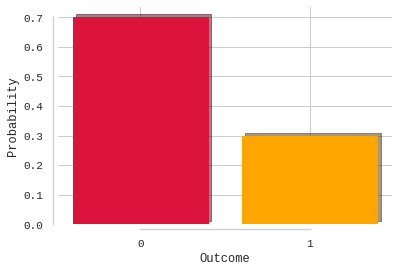

In [ ]:
#@title Bernoulli Distribution -- Adjust slider below to see how the distribution shape changes with parameter { run: "auto", vertical-output: true, display-mode: "form" }
from scipy.stats import bernoulli

theta = 0.3 #@param {type:"slider", min:0, max:1, step:0.1}

ber_rv = bernoulli(p = theta)

fig, ax = plt.subplots(1,1)
bplot = ax.bar([0, 1], ber_rv.pmf([0, 1]))
ax.set_xticks([0, 1])
ax.set_xlabel("Outcome")
ax.set_ylabel("Probability")
sns.despine(offset=5, trim=True)
for i, bar in enumerate(bplot):
  bar.set_color("crimson") if i == 0 else bar.set_color("orange")
  ax.add_patch(Shadow(bar, 0.02, 0.01))


## The Binomial distribution


<img src= https://raw.githubusercontent.com/MunskyGroup/uqbio2022/master/files/files_statistics/Module_2_1_Ania/Slide21.png alt="drawing" width="1000"/>

Let $S = X_1 + X_2 + \ldots + X_n$ where $n$ is a fixed integer and $X_1,\ldots, X_n$ are __independent__ random variables that are distributed according to the Bernoulli distribution with the __same__ parameter $p$. Then $S$ will be a discrete random variable with a __Binomial Distribution__ with parameters $n$ and $p$, and we write $S\sim \mathrm{Binomial}(n;p)$. It has the probability mass function
$$
\mathrm{Pr}(S = y) = \mathrm{Binomial}(y \vert n, p) := \left(\begin{array}{c} y\\n \end{array} \right) p^y(1-p)^{1-y}.
$$

Here 
$$
\left(\begin{array}{c} y\\n \end{array} \right)  := \frac{
    n! 
}{
    (n-y)!y!
}
$$ 
is pronounced "_n choose y_" and is the total number of ways to take $y$ objects without replacement from a set of $n$ objects.

The binomial distribution models the number of heads you get when flipping a coin $n$ times, where the probability of getting head in each flip is p. It could also model the probability distribution for how many cells will have a given phenotype when you measure $n$ total cells and the phenotype probability is $p$.


In the following interactive cell, try to change the parameters of the distribution yourself and observe how the shape of the distribution changes accordingly. As you assign large values for $n$, you will see that the distribution starts to look like a bell curve with relatively concentrated mass around its peak value. It turns out that this shape is approximated well by another distribution that we will discuss next.

* What is the mean of a Binomial random variable?
* What is the variance and standard deviation?

(0.0, 0.40679151345000036)

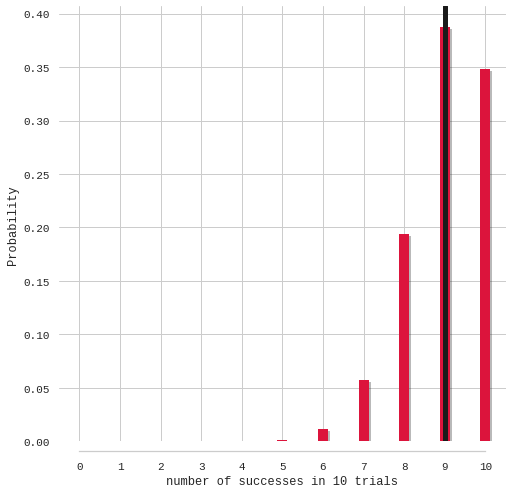

In [ ]:
#@title Binomial Distribution - Change parameters to see effect on distribution.{ run: "auto", vertical-output: true, display-mode: "form" }
from scipy.stats import binom 

n =  10#@param {type: "integer"}
p =  0.9#@param 

binom_rv = binom(n=n, p=p)
k= np.arange(n+1)

pmf = binom_rv.pmf(k=k)
mean = binom_rv.mean()

fig, ax = plt.subplots()
fig.set_size_inches(8,8)
ax.vlines(k, 0, pmf, colors='crimson', linestyles='-', lw=10,
          path_effects=[SimpleLineShadow(shadow_color='k'), Normal()])
ax.axvline(x=mean, color='k', lw=5)
ax.set_xlabel(f"number of successes in {n} trials")
ax.set_ylabel("Probability")
ax.set_xticks(k)
sns.despine(left=True, offset=10, trim=True)
ax.set_ylim([0, None])

## The Poisson distribution

<img src= https://raw.githubusercontent.com/MunskyGroup/uqbio2022/master/files/files_statistics/Module_2_1_Ania/Slide22.png alt="drawing" width="1000"/>


A discrete random variable $X$ has the Poisson distribution with parameter $\lambda$, denoted by $X\sim \mathrm{Poisson}(\lambda)$, if it has the PMF
$$
p_X(k) = \frac{\lambda^k}{k!}\exp(-\lambda),\; k=0,1,2,\ldots
$$

The Poisson distribution has the theoretical origin as the limit for certain sequences of binomial distributions. In particular, let $X \sim \mathrm{Binomial}(n,\theta)$ be a binomially distributed variable. Now, let $n$ increases but $\theta$ decreases such that $\lambda := n\theta$ remains constant. Then, as $n$ gets really large, the PMF of $X$ is about the same as that of a Poisson distribution with parameter $\lambda$.


In the following interactive cell, you can explore the shape of the Poisson distribution for the specific value of $\lambda$ of your choice.

mean= 20.0
var = 20.0
fano = 1.0


(0.0, 0.09327708326168904)

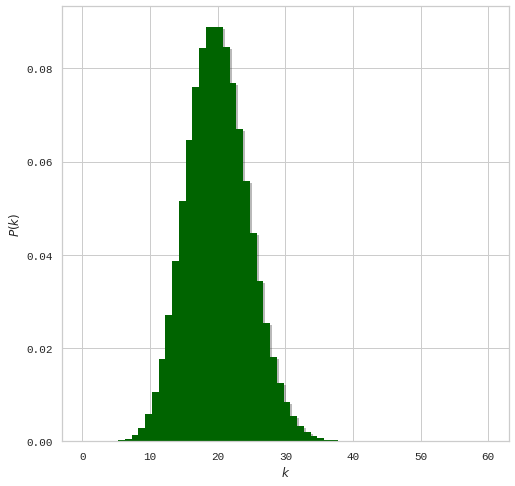

In [ ]:
#@title Poisson Distribution - Adjust the Lambda to see effect on distribution shape. { run: "auto", vertical-output: true, display-mode: "form" }
from scipy.stats import poisson 

Lambda =  20#@param
max_plot_range =  60#@param

# Create the Poisson random variable object
poiss_rv = poisson(Lambda)

# Compute the probability mass over the discrete values 0, 1, ..., max_plot_range
k = np.arange(max_plot_range+1)
pmf = poiss_rv.pmf(k=k)
mean = poiss_rv.mean()
var = poiss_rv.var()
print(f"mean= {mean}\n"
      f"var = {var}"
)
fano_factor = var/mean 
print(f"fano = {fano_factor}")

# Plot the computed probabiliy mass values
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
ax.vlines(k, 0, pmf, colors='darkgreen', 
          linestyles='-', lw=10,
          path_effects=[SimpleLineShadow(), Normal()])
ax.set_xlabel("$k$")
ax.set_ylabel("$P(k)$")
ax.set_ylim([0, None])

In practice, the Poisson distribution is often used to count random arrivals. For example, a Poisson random variable can describe the number of buses ariving at a station within a time interval, the number of mRNA transcription initiations in a given period of time.  In these cases the $\lambda = a\Delta t$, where $a$ is the 'arrival rate' or 'transcription initiation rate' and $\Delta t$ is the ellapsed time.

Because the need for counting is ubiquitious in science, you will see the Poisson distribution alot in the stochastic gene expression modeling literature. One important place is in approximate simulation methods such as $\tau$-leaping (look it up!). Another place is in analytical expressions for the stationary distributions of different gene expression models (see, for example, _Peccoud and Ycart "Markovian modeling of gene-product synthesis" Theoretical Population Biology 1995_).

## How are Poisson and Binomial Distributions Related?

The Poisson distribution provides a computationally stable way to approximate the PMF of binomial distributions, as we mention above. The factorials and powers involved in the PMF of a $\mathrm{Binomial}(n,\theta)$ distribution become very difficult to compute as $n$ becomes large and it is advisable to replace it with a Poisson variable with parameter $\lambda:=n\theta$.

Now we will explore how the probability mass functions of the Poisson and Binomial distributions are related to each other. Try playing with the different values for the parameters of the Poisson and the Binomial distributions below. Could you find parameters for which the corresponding Poisson and Binomial PMFs appear to perfectly match each other? (Hint: Try it for large $n$ and adjust $p$ so that $\lambda = n\cdot p$).

(0.0, 0.06394608371767697)

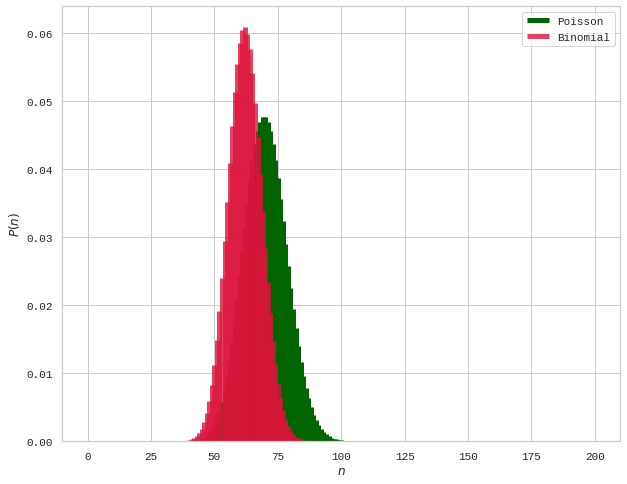

In [ ]:
#@title Compare Poisson and Binomial { run: "auto", vertical-output: true, display-mode: "form" }
#@markdown Adjust the parameters $p$ and $n$ for the Binomial distribution here
n =  200#@param
p = 0.31 #@param {type:"slider", min:0.0, max:1.0, step:0.01}
#@markdown Adjust the parameter $\lambda$ for the Poisson distribution here. What should you choose to get them to match?
Lambda = 70 #@param
#@markdown Set the range for plotting the PMF
max_plot_range =  200#@param

binom_rv = binom(n=n, p=p)
poiss_rv = poisson(Lambda)

k = np.arange(max_plot_range+1)
binom_pmf = binom_rv.pmf(k=k)
poiss_pmf = poiss_rv.pmf(k=k)

# Plot the computed probabiliy mass values
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
ax.vlines(k, 0, poiss_pmf, 
          colors='darkgreen', linestyles='-', lw=5, label="Poisson")
ax.vlines(k, 0, 
          binom_pmf, 
          colors='crimson', linestyles='-', lw=5, label="Binomial", alpha=0.8)
ax.legend()
ax.set_xlabel("$n$")
ax.set_ylabel("$P(n)$")
ax.set_ylim([0, None])


## The Geometric Distribution


<img src= https://raw.githubusercontent.com/MunskyGroup/uqbio2022/master/files/files_statistics/Module_2_1_Ania/Slide23.png alt="drawing" width="1000"/>

One final distribution for our list of discrete-valued random variables is the __geometric distribution__. This distribution is defined for a discrete random variable taking positive integers $1,2,3\ldots$ as values, with PMF given by 
$$
p_X(k) = (1-p)^{k-1}p,
$$ 
and we write $X \sim \mathrm{Geom}(p)$ to denote a geometrically distributed random variable. This distribution is parametrized by $p \in [0,1]$. We can interpret $X$ as modeling the number of attempts needed before the first success, with $p$ as the probability of success in each trial.

This distribution captures the number of times you may need to flip a coin before you get a "heads".

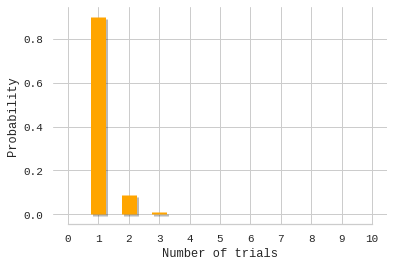

In [ ]:
#@title Adjust the parameters below to explore distribution shapes { run: "auto", vertical-output: true, display-mode: "form" }
from scipy.stats import geom 

p =  0.9#@param
nmax = 10 #@param

geom_rv = geom(p=p)
pmf = geom_rv.pmf(np.arange(0, nmax+1))

fig, ax = plt.subplots(1,1)
vl = ax.vlines(np.arange(0, nmax+1), 0, 
          pmf, 
          colors='orange', 
          linestyles='-', lw=15,
          path_effects = [SimpleLineShadow(), Normal()]
          )

ax.set_xlabel("Number of trials")
ax.set_ylabel("Probability")
ax.set_xticks(np.arange(0, nmax+1))
sns.despine(trim=True, left=True)


Look at how _hard_ it is to _fail_ on the 8th trial onwards. Quite a mathematical argument for being persistent in life, isn't it?

Jests aside, the geometric distribution has been used to model the number of mRNA molecules produced during a burst of a gene's transcriptional activity. For this, we need to change it just a little bit. Let $p$ denote the probability of successful initiation, and we now want to ask how many times (i.e., 0,1,2,...) will instead of asking how many times will initiation be successful before the first time it fails. This distribution has the PMF given by 
$$
p_X(k) = (1-p)^{k}p.
$$ 

# Basic distributions for Continous Random Variables


## The Uniform distribution


<img src= https://raw.githubusercontent.com/MunskyGroup/uqbio2022/master/files/files_statistics/Module_2_1_Ania/Slide24.png alt="drawing" width="1000"/>

A continuous random variable $X$ is said to have a uniform distribution with parameters $a$ and $b$ (with $a< b$), denoted by $X\sim U(a,b)$, if its probability density function is given by
$$
f_X(x) = \frac{
    1
}{
    b-a
}\mathbb{1}(a\leq x \leq b)
$$
where $\mathbb{1}(A)=0$ if statement $A$ is false and $1$ otherwise. This distribution will be essential in implementing stochastic simulation algorithm and Metropolis-Hastings algorithm later in this summer school.

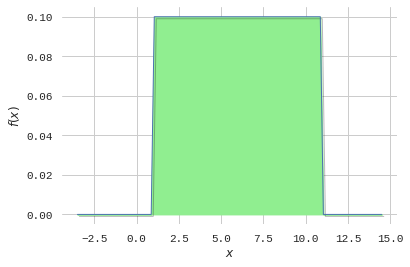

In [ ]:
#@title Adjust parameters to change the PDF shape { run: "auto", vertical-output: true }
from scipy.stats import uniform

a =  1#@param
b =  10#@param

uni_rv = uniform(a, b)
x = np.linspace(a-0.5*np.abs(b-a), b+0.5*np.abs(b-a), 100)
pdf = uni_rv.pdf(x=x)

fig = plt.figure()
ax = fig.add_subplot()
lp = ax.plot(x, pdf, lw=1,
             path_effects=[SimpleLineShadow(), Normal()]
             )
ax.fill_between(x, pdf, color="lightgreen")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(x)$")

sns.despine(trim=True, left=True, bottom=True)



## The Exponential distribution


<img src= https://raw.githubusercontent.com/MunskyGroup/uqbio2022/master/files/files_statistics/Module_2_1_Ania/Slide26.png alt="drawing" width="1000"/>

A continuous random variable $X$ has an exponential distribution with `rate' parameter $\alpha > 0$, denoted by $X \sim \mathrm{Exp}(\alpha)$,  if it has the PDF
$$
f_X(x) = 
\begin{cases}
\alpha\exp(-\alpha x),\;\text{if }x\geq 0,\\
0,\text{ otherwise}
\end{cases}.
$$
The CDF of this variable is then
$$
F_X(x)
=
\begin{cases}
0,\;x<0,\\
1-\exp(-\alpha{x}),\; x\geq 0.
\end{cases}
$$

The exponential distribution will be _very important_ later in this summer school as we discuss the concept of Markov jump models for stochastic gene expression and the stochastic simulation algorithm. 

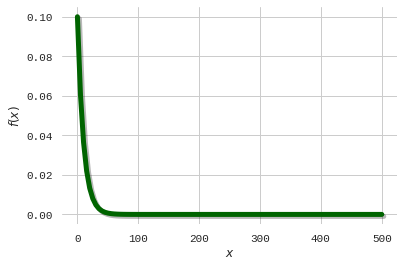

In [ ]:
#@title Exponential Distribution { run: "auto", vertical-output: true }
from scipy.stats import expon 

#@markdown Adjust the parameter of the Exponential here
alpha =  0.1#@param 
exp_rv = expon(scale=1/alpha)

xmax =  500#@param

x = np.linspace(0, xmax, 100)
pdf = exp_rv.pdf(x=x)

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x, pdf, lw=5,
        path_effects = [SimpleLineShadow(), Normal()],
        color="darkgreen"
        )
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(x)$")

sns.despine(left=True, bottom=True, trim=True)

Most importantly, the Exponential distribution satisfies the __memoryless property__. Mathematically, it is stated that for a random variable $X\sim \mathrm{Exp}(\alpha)$ we have
$$
P(X > x + a | X > a) = P(X > x).
$$
Visually, if you plot the function $P(X > x + a | X > a)$ as a function of $x>0$, you will see that it is the same as the plot of the right-tail probability of $X$ itself! Let try that, shall we?

First, let us use Bayes' formula to get
$$
P(X > x + a | X > a) = \frac{P(X> x+a \text{ and } X>a)}{P(X>a)} = \frac{P(X>x+a)}{P(X>a)}.
$$

So in order to compute the conditional density function, you need to find the right-tail probabilities $P(X>t)$ of $X$ for any $t>0$. This is actually just one minus the CDF of $X$:
$$
P(X>t) = 1 - F_X(t).
$$

We can write a Python function to compute this distribution with the help of `scipy.stats` built-in functions:

In [ ]:
def exp_right_prob(rv: sp.stats.expon, t: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
  return 1.0 - rv.cdf(t)

From this, we can easily write a function to compute the condtional probability above. Here it is:

In [ ]:
def exp_cond_right_prob(rv: sp.stats.expon, x: float, a: Union[float, np.ndarray])->Union[float, np.ndarray]:
  return exp_right_prob(rv, x+a)/exp_right_prob(rv, a)

Now we are ready to visualize the memoryless property. The codes are contained in the interactive cell below. Try playing with the parameters yourself and double-click on the cell to see the codes.

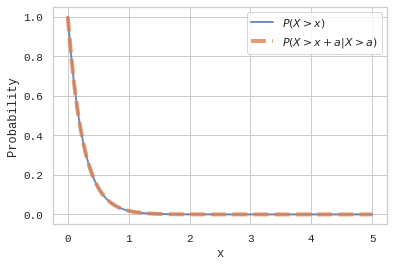

In [ ]:
#@title Memoryless Property of Exponential Distribution { run: "auto", vertical-output: true }

alpha = 4.0 #@param
a = 1 #@param
xmax =  5#@param

rv = sp.stats.expon(scale=1/alpha)
fig, ax = plt.subplots(1,1)
xs = np.linspace(0, xmax, 100) 
exp_rps = exp_right_prob(rv, xs)
exp_crps = exp_cond_right_prob(rv, xs, a)

ax.plot(xs, exp_rps, lw = 2, label="$P(X>x)$", alpha=0.8)
ax.plot(xs, exp_crps, lw = 4, ls = '--', label="$P(X>x+a|X>a)$", alpha=0.8)
ax.set_xlabel("x")
ax.set_ylabel("Probability")
ax.legend()

Because of this _memoryless_ property, the Exponential distriubtion plays an important role in the theory of continuous-time Markov process. In fact, it is used to model the waiting time between two reaction events in a stochastic chemical reaction network. We will have an opportunity to explore this in Module 3 of this Summer School.

## The Normal distribution

<img src= https://raw.githubusercontent.com/MunskyGroup/uqbio2022/master/files/files_statistics/Module_2_1_Ania/Slide25.png alt="drawing" width="1000"/>

A continuous random variable $X$ has a normal distribution with parameters $\mu$ and $\sigma^2$, written $X\sim N(\mu, \sigma^2)$ if it has probability density function
$$
f_X(x) = \frac{
    1
}{
    \sqrt{2\pi\sigma^2}
}\exp\left(-\frac{
    1
}{
    2
}\left(\frac{
    x-\mu
}{
    \sigma
}\right)^2\right).
$$

Unlike the previously introduced distributions, the CDF of a normal distributions cannot be expressed through elementary functions. Specifically, if $X\sim N(\mu, \sigma^2)$ then
$$
F_X(x)
=
\frac{
    1
}{
    2
}\left[1 + \mathrm{erf}\left(\frac{
    x-\mu
}{
    \sigma\sqrt{2}
}\right)\right]
$$
where 
$$\mathrm{erf}(u) := \frac{
    2
}{
    \sqrt{\pi}
}\int_{0}^{u}{e^{-t^2}\mathrm{dt}}$$
is called the error function. An important special case of the normal distribution is the standard normal distribution $N(0,1)$ which has parameters $\mu=0$ and $\sigma^2=1$.

The normal distribution has a very important role in statistics. One reason is that many random quantitites tend to be approximately normally distributed for large sample size. Specifically, the Central Limit Theorem (CLT) states that for random variables $X_1,\ldots, X_n$ that are independent and identically distributed with the same mean $\mu$ and variance $\sigma^2$, and let 
$$
\overline{X}:=\frac{
    X_1+\ldots+X_n
}{
    n
}$$
be the sample mean, then the distribution of the random variable $$Z:=\sqrt{n}\left(\frac{
    \overline{X} - \mu
}{
    \sigma
}\right)$$
is well-approximated by a standard normal distribution $N(0,1)$ when $n$ is large.

The normal distribution is also essential for understanding the mathematical idea behind regression in machine learning. For example, why is the mean squared loss function so popular? 

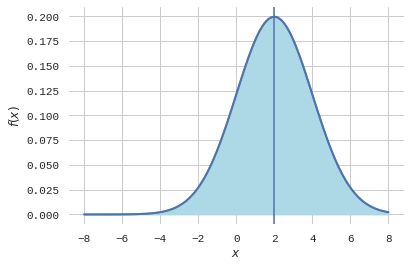

In [ ]:
#@title Normal Distribution { run: "auto", vertical-output: true }
from scipy.stats import norm 

mu = 20#@param
sigma = 2.0#@param

norm_rv = norm(loc=mu, scale=sigma)

xmin = mu - 3*sigma 
xmax = mu + 3*sigma 
x = np.linspace(-xmax, xmax, 100)
pdf = norm_rv.pdf(x=x)

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x, pdf, lw=2, 
        path_effects = [SimpleLineShadow(offset=(0.1, 0.1)),
                        Normal()]
        )
ax.fill_between(x, pdf, color="lightblue")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(x)$")
ax.axvline(mu)

sns.despine(left=True, bottom=True, trim=True)


# Drawing Samples from Arbitrary Distributions


<img src= https://raw.githubusercontent.com/MunskyGroup/uqbio2022/master/files/files_statistics/Module_2_1_Ania/Slide16.png alt="drawing" width="1000"/>

Above we showed how to use Python to generate random numbers for a few common distributions, but what if you need to generate a random number from a more complex distribution?  In this section, you will learn how to generate a random variable from any distribution for which you can define the cumulative distribution function.

The trick is simple.  

First, let's assume that we already know how to generate a (pseudo) random number from a continuous distribution for which also we know the CDF. The simplest and most common choice is to use a uniform random variable between zero and one: $r \sim U(0,1)$, for which we know that the CDF is:
$$
F_R(r) = \left\{  \begin{array}{ll}
0\text{ for }r<0,\\
r\text{ for }0\leq r \leq 1,\\
1\text{ for }r>1  
 \end{array}\right\}.
$$ 
Every scientific computing language provides a pseudo random number generator to generate $r$ from $U(0,1)$.

Next, if we also know cumulative distribution function, $x\sim F_X(x)$, we can invert it and use $r$ to generate a sample for $x$ according to:
$$
x = F_X^{-1}(F_R(r)) = F_X^{-1}(r)
$$

Let's try it for a couple examples:
1. For the continuous valued __Exponential__ distribution, we saw that:
$$
f_X(x) = a\exp(-ax)\text{, for }x\ge 0,
$$
which we can integrate with respect to $x$ to find:
$$
F_X(x) = 1-\exp(-ax)\text{, for }x\ge 0.
$$
Since we know for the uniform random variable $r = F_R(r) = F_X(x)$, we can now invert to solve for $x$ provided that we can generate $r$:
$$
x = F_X^{-1}(r) = -\frac{\log(1-r)}{a},
$$
or since $(1-r)$ has the same distribution as $r$, we can simplify to:
$$
x = F_X^{-1}(r) = -\frac{\log(r)}{a},
$$
Let's check that in Python:


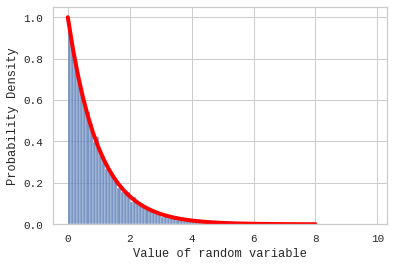

In [ ]:
#@title Generate Exponentially Distributed Random Variables { run: "auto", vertical-output: true }
from scipy.stats import uniform
import numpy as np

a = 1.0 #@param
NS = 10000 #@param

r = uniform.rvs(size=NS)
x = -np.log(r)/a

fig, ax = plt.subplots(1,1)
sns.histplot(x, ax=ax, stat="density", label="Distribution of Sampled Variables")

xs = np.linspace(0.0,8./a)
Pexp = a*np.exp(-a*xs)

ax.set_xlabel("Value of random variable")
ax.set_ylabel("Probability Density")
ax.plot(xs, Pexp, c="red", lw=4, label="Exact Density")

2. Let's now try it for a discrete categorical distribution where each category has a weight of $\alpha_n$ for $n=0,1,\ldots,N$. This distribution has the probability mass function:
$$
p_N(n) = \frac{\alpha_n}{\sum_{i=1}^{N}{\alpha_i}}
$$
and the cumulative distribution function:
$$
F_N(n) = \frac{\sum_{i=1}^{n}\alpha_i}{\sum_{i=1}^{N}{\alpha_i}}
$$
As before, we can use the uniform random variable $r = F_R(r) = F_N(n)$, which we can invert to solve for $n$:
$$
n = F_N^{-1}(r) = \text{smallest $n$ such that } \left(\frac{\sum_{i=1}^{n}\alpha_i}{  \sum_{i=1}^{N}{\alpha_i}} > r\right).
$$
Let's try it in Python:

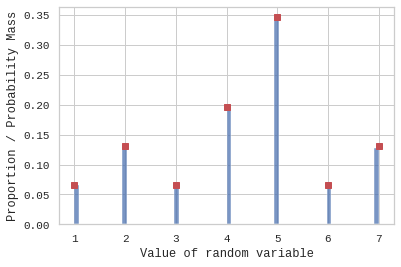

In [ ]:
#@title Generating Categorical Random Variables { run: "auto", vertical-output: true }
from scipy.stats import uniform
import numpy as np

a = [1.0, 2.0, 1.0, 3.0, 5.3, 1.0, 2.0] #@param
NS = 100000 #@param

N = np.size(a) #Number of categories

# Generate uniform random variable
r = uniform.rvs(size=NS)

# Compute CDF for categorical RV
CDF = np.cumsum(a)/sum(a)

# Now to count how many bins are below the value of r
n = np.ones(NS)
for i in range(N-1):
  n = n + (r>CDF[i])

# Now to plot the sampling results
fig, ax = plt.subplots(1,1)
sns.histplot(n, ax=ax, stat="proportion", label="Distribution of Sampled Variables")
ax.set_xlabel("Value of random variable")
ax.set_ylabel("Proportion / Probability Mass")

# Now to add the exact distribution to the plot:
xs = range(1,N+1)
ax.plot(xs, a/np.sum(a), "rs", lw=4, label="Exact Density")

# How Changing Units or Scaling a Random Variable Affects its Probability Distribution


<img src= https://raw.githubusercontent.com/MunskyGroup/uqbio2022/master/files/files_statistics/Module_2_1_Ania/Slide17.png alt="drawing" width="1000"/>

Sometimes it is necessary to transform a random variable.  For example, you may wish to change its units of measurement (e.g., inches to centimeters); you may want to scale the random number by a value; or you may need to change how you present the distribution of that variable on a linear to logarithmic plot.

While it is easy to make such changes to the random variables themselves (e.g., to change $x$ to $y(x)$), the effect on the distribution (e.g., changing from $f_X(x)$ to $f_Y(y)$) and therefore on the expected values can be more complicated.

How complicated, will depend on the nature of the function $y = g(x)$.  

__Simplest case -- $g(x): \mathbb{R}\rightarrow \mathbb{R}$ is one-to-one__

We start with the simplest case where $x$ and $y = g(x)$ are both continuous and where each value of $y(x)$ is associated with exactly one value of $x$, and vice-verso (i.e., the transformation $g$ is one-to-one). Like we did in the previous section, we need to consider the cumulative probability distributions:
$$
F_Y(y) = P(Y\leq y) = P(g(X)\leq y) = P(X\leq g^{-1}(y)) = F_X(g^{-1}(y))
$$

Starting with this, we can take the derivative to get the probability density function:
$$
f_Y(y) = \frac{d}{dy}F_Y(y) =  \frac{d}{dy}F_X(g^{-1}(y)) = \left(\frac{\partial}{\partial x}F_X\right)_{x=g^{-1}(y)}\frac{\partial}{\partial y}g^{-1}(y) = f_X(g^{-1}(y))\frac{\partial}{\partial y}g^{-1}(y)
$$
To account for the case where $g(x)$ is a decreasing function of $x$ (i.e., when $\frac{\partial}{\partial y}g^{-1}(y)$ is negative), we can to adjust this slightly to:
$$
f_Y(y) = f_X(g^{-1}(y))\left|\frac{\partial}{\partial y}g^{-1}(y)\right|
$$

Let's try this out in python for a couple examples where we can start with a random variable from $U(0,1)$ and transform it into another random variable:

f_X(x) = 1.0
ginv =  [-sqrt(y), sqrt(y)]
dginv_dy =  -1/(2*sqrt(y))


(0.0, 4.95265207486804)

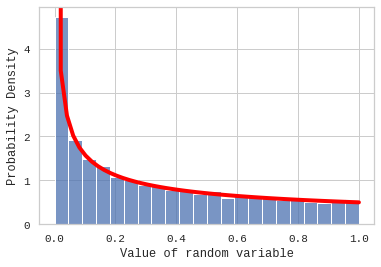

In [ ]:
#@title Transforming Random Variables { run: "auto", vertical-output: true }
from scipy.stats import uniform
from scipy.stats import norm
import numpy as np
import sympy as sym

x, y = sym.symbols("x y")
g_of_x =   x**2.#@param
NS = 10000 #@param

# Define fx for uniform random variable U(0,1)
fx = 1. # Uniform RV ~ U(0,1)
# fx = 1./sym.sqrt(2*sym.pi)*sym.exp(-x**2./2.) # Normal RV ~ N(0,1)
print("f_X(x) =", fx)

# Invert to find function ginv(y)
ginv = sym.solve(sym.Eq(y,g_of_x),x)
print("ginv = ", ginv)

# Find derivative of ginv with respect to y
dginv_dy = sym.diff(ginv[0],y)
print("dginv_dy = ", dginv_dy)

# Write lambda functions for f_X(x), g(x), g_inv(y), and dginv/dy
fx_func = sym.lambdify(x,fx,'numpy')
g_of_x_func = sym.lambdify(x, g_of_x,'numpy') # returns a numpy-ready function
ginv_of_y_func = sym.lambdify(y, ginv[0],'numpy') # returns a numpy-ready function
dginv_dy_func = sym.lambdify(y, dginv_dy,'numpy') # returns a numpy-ready function

# Sample RVs for x in U(0,1)
rx = uniform.rvs(size=NS)
# rx = norm.rvs(size=NS)
xlims = np.array([1e-6,1])

# Convert to RVs for y
ry = g_of_x_func(rx)

# Compute density at range of y values
ys = np.linspace(min(g_of_x_func(xlims)),max(g_of_x_func(xlims)))
fy = fx_func((ginv_of_y_func(ys)))*abs(dginv_dy_func(ys))+np.zeros_like(ys)
# We add a zeros so the result is returned at the correct size

# Plot the results
fig, ax = plt.subplots(1,1)
sns.histplot(ry, ax=ax, stat="density", label="Distribution of Sampled Variables")
ylim = ax.get_ylim()
ax.plot(ys, fy, c="red", lw=4, label="Exact Density")
ax.set_xlabel("Value of random variable")
ax.set_ylabel("Probability Density")
ax.set_ylim(ylim)

Please remember -- the above transformation approach only works when the transformation $g(x)$ is one-to-one.  Can you think why it might not work for a non-monotonic function like such as the change of variables $y= g(x) = (x-.5)^2$?

How would you change the above code to transform a Gaussian random variable?

# The Central Limit Theorem

<img src= https://raw.githubusercontent.com/MunskyGroup/uqbio2022/master/files/files_statistics/Module_2_1_Ania/Slide18.png alt="drawing" width="1000"/>

<img src= https://raw.githubusercontent.com/MunskyGroup/uqbio2022/master/files/files_statistics/Module_2_1_Ania/Slide19.png alt="drawing" width="1000"/>

The Central Limit Theorem (CLT) says that an empirical estimate of the mean $\frac{x_1 + \ldots + x_n}{n}$ from a set of $n$ independent realizations $x_1, \ldots, x_n$ of a random variable $X$ will be approximately normally distributed with mean $\mathbb{E}(X)$ and variance $\frac{1}{n}\mathrm{Var}(X)$, _provided_ that the mean and variance of $X$ exist (i.e., the sums or integrals in their definitions converge) and are finite (i.e., have finite value). 

First, let's initialize our random number generator

In [ ]:
rng = np.random.default_rng(0)

In the code cell below, we define a function to generate a random dataset of size $n$ for a given random variable. Take a moment to make sure you understand what the function does.

In [ ]:
def simulate_iid_dataset(rv: Union[sp.stats.rv_continuous, 
                                   sp.stats.rv_discrete], 
                         n: int=100, 
                         rng=rng):
  return rv.rvs(size=n, random_state=rng)

rng = np.random.default_rng(0)
print(simulate_iid_dataset(rv=sp.stats.uniform, n = 10, rng=rng))

rng = np.random.default_rng(0)
print(simulate_iid_dataset(rv=sp.stats.uniform, n = 10, rng=rng))

[0.63696169 0.26978671 0.04097352 0.01652764 0.81327024 0.91275558
 0.60663578 0.72949656 0.54362499 0.93507242]
[0.63696169 0.26978671 0.04097352 0.01652764 0.81327024 0.91275558
 0.60663578 0.72949656 0.54362499 0.93507242]


In the following cells, we will first use a binomial distribution for $X$. You can go back to this cell again and uncomment other distributions.

In [ ]:
# rv = binom(n=10, p=0.2)  # binomial with parameters n=10, p=0.2
# rv = norm(loc=1.0, scale=5.0) # normal with mu=1.0, sigma=5.0**2.0
# rv = poisson(10.0) # Poisson with parameter lambda=10.0
rv = expon(scale=10^4) # Exponential

NameError: ignored

Using the function `simulate_iid_dataset` we defined above with the random variable you created in the preceding cell, we can generate datasets of indpendently identically distributed samples. For example, in the following cell, we generate a list of $5$ datasets, each comprise of $10$ i.i.d. observations.

In [ ]:
dataset_size = 10
datasets = [simulate_iid_dataset(rv, n=dataset_size) for i in range(5)]
print(datasets)
print(len(datasets))
len(datasets[0])

[array([9.51904666e+00, 1.42743594e+01, 2.77293276e-01, 3.17705735e-02,
       7.70480022e+00, 2.28191661e+01, 9.43016134e+00, 1.05742190e+01,
       3.94350037e+01, 8.48085431e+01]), array([4.60099956e+01, 1.80285047e-02, 3.17673253e+01, 1.01496759e+00,
       1.49716042e+01, 1.18850624e+01, 4.40987211e+01, 4.95614059e+00,
       4.29955595e+00, 2.08910718e+01]), array([ 0.51805878,  1.89463137, 14.42277349, 10.84367505, 24.32749914,
        5.7913812 ,  6.27495069, 25.92929294, 24.15299054,  4.52842983]), array([ 2.95065989, 17.12611544,  7.53653885, 11.96559131, 14.68211094,
       17.25038901, 40.99437039,  2.15164262, 20.52126881, 15.73932541]), array([26.57270586,  8.38588764,  6.5615853 , 11.43950243,  3.7025699 ,
       10.44151485,  1.48486878, 23.05726351, 31.90933435,  7.72943464])]
5


10

You can use the numpy function `mean()` to find the sample mean for each dataset. 

In [ ]:
mean_ests = [np.mean(X) for X in datasets] # "list comprehensive"

print(mean_ests)

[19.887436340818777, 17.991247311538665, 11.868368304108293, 15.091801267142383, 13.128466725357956]


Now let us put everything we just discussed above into an interactive cell. Try varying the dataset size yourself to see how the approximation quality of the CLT distribution changes. Usually, the approximation will be not great when the dataset size is small. However, as you increase the dataset size, the histogram of the mean estimates gets closer to a normal distribution with mean and variance predicted by the CLT.

Draw lots of independent datasets from $\exp(\alpha)$, each dataset has only one sample.

What is the distribution of the sample mean?

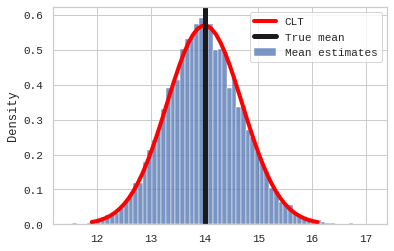

In [ ]:
#@title Change sample size to explore estimator variability { run: "auto", vertical-output: true, display-mode: "form" }


dataset_size =  400#@param 

datasets = [simulate_iid_dataset(rv, n=dataset_size) for i in range(10000)]

mean_ests = [np.mean(X) for X in datasets]

clt_approx = norm(loc=rv.mean(), scale=rv.std()/np.sqrt(dataset_size))

xs = np.linspace(clt_approx.mean() - 3*clt_approx.std(), clt_approx.mean() + 3*clt_approx.std())
clt_pdf = clt_approx.pdf(xs)

fig, ax = plt.subplots(1,1)
sns.histplot(mean_ests, ax=ax, stat="density", label="Mean estimates")
ax.plot(xs, clt_pdf, c="red", lw=4, label="CLT")
ax.axvline(x=rv.mean(), color="k", lw=5, alpha=1, label="True mean")
ax.legend()

# Summary of Basic Univariate Distributions

| Distribution | Parameters        | Mean              | Variance              | `scipy` object                                                                                             | `numpy` random number generator method                                                                                                                                                      |
| ------------ | ----------------- | ----------------- | --------------------- | ---------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Bernoulli    | $$\theta$$        | $\theta$          | $1 -\theta^2$         | [`scipy.stats.bernoulli`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html) | [`random.Genrator.binomial()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial)                                |
| Binomial     | $$n,\ \theta$$    | $$n\cdot \theta$$ | $$n\theta(1-\theta)$$ | [`scipy.stats.binom`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html)         | [`random.Generator.binomial()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial)                               |
| Poisson      | $$\lambda$$       | $\lambda$         | $\lambda$             | [`scipy.stats.poisson`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)     | [`random.Generator.poisson()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html?highlight=poisson#numpy.random.Generator.poisson)                |
| Uniform      | $$a,b$$           | $$\frac{a+b}{2}$$ | $\frac{(b-a)^2}{12}$  | [`scipy.stats.uniform`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html)     | [`random.Generator.uniform()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html?highlight=uniform#numpy.random.Generator.uniform)                |
| Exponential  | $$\alpha$$        | $1/\alpha$        | $1/\alpha^2$          | [`scipy.stats.expon`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html)         | [`random.Generator.exponetial()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.exponential.html?highlight=exponential#numpy.random.Generator.exponential) |
| Normal       | $$\mu, \ \sigma$$ | $\mu$             | $\sigma^2$            | [`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html)          | [`random.Generator.normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html?highlight=normal#numpy.random.Generator.normal)                                                                                                                                                                                            |
  

 --


# Notebook Study Questions

Please enter your answers for each of the following questions by adding text or code to fill in the blanks.  For the more advanced questions, you may need to do some calculations or create a graph or figure.

##Probability and Statistics - Workbook Completion Requirements:##
To obtain credit for this lesson, each student should (i) complete all blanks for questions Q1-Q7, (ii) answer a minimum of two questions in the set Q8-17, and (iii) answer minimum of two questions from Workbook Module 2.1.B.

To obtain a certificate for the course, you must complete a minimum of five notebooks from Modules 1-4 (please note that preliminary notebooks from Module 0 will not be accepted) and submit them together via email before August 15, 2022. Please submit your completed notebooks to qbio_summer_school@colostate.edu

## Easy Questions:

In [ ]:
#Easy Questions
import textwrap
wrapper = textwrap.TextWrapper(width=50)
def wrap(value,width=60): 
  wrapper = textwrap.TextWrapper(width)
  word_list = wrapper.wrap(text=value)
  # Print each line.
  for element in word_list:
    print(element)

wrap("Q1. Suppose that x1 and x2 are normally distributed random variables.  What kind of distribution would describe the new random variable y = x1 + x2?")
print('A1 = answer')
print(' ')

Q1. Suppose that x1 and x2 are normally distributed random
variables.  What kind of distribution would describe the new
random variable y = x1 + x2?
A1 = answer
 


In [ ]:
wrap("Q2. Suppose that x1 and x2 are exponentially distributed random variables.  What kind of distribution would describe the random variable y = min(x1,x2)?")
print('A2 = answer')
print(' ')

Q2. Suppose that x1 and x2 are exponentially distributed
random variables.  What kind of distribution would describe
the random variable y = min(x1,x2)?
A2 = answer
 


In [ ]:
wrap("Q3. A Gene is ON at some time t=0.  It can turn OFF at a rate of a = 5/min (i.e., the distribution for the time until it turns off is exponential with parameter a=5/min). What is the probability that it is still ON at a time t = 1 min?")
a = 5.0
t = 1.0
pOnAt_1 = -1.37  # add code to find correct answer
print('A3 = ' + str(pOnAt_1))
print(' ')

Q3. A Gene is ON at some time t=0.  It can turn OFF at a
rate of a = 5/min (i.e., the distribution for the time until
it turns off is exponential with parameter a=5/min). What is
the probability that it is still ON at a time t = 1 min?
A3 = -1.37
 


In [ ]:
wrap("Q4. What is the Fano Factor of a Poisson random variable?  Of an exponential random variable? How do these depend on the mean of the random variables?")
mean = 1.34
variance = 2.3
Fano = 1.23231  # add code to find correct answer
CoefficientOfVariance = 1.23231  # add code to find correct answer
print("A4.a Fano = " + str(round(Fano,3)))
print("A4.b CV = " + str(round(CoefficientOfVariance,3)))
print(' ')

Q4. What is the Fano Factor of a Poisson random variable?
Of an exponential random variable? How do these depend on
the mean of the random variables?
A4.a Fano = 1.232
A4.b CV = 1.232
 


In [ ]:
wrap("Q5. What is the Coefficient of Variation (std/mean) of a Poisson random variable with parameter a1?  Of an exponential random variable with parameer a2? How do these depend on the mean of the random variable?")
a1 = 2.3 # parameter of Poisson RV
CV1 = 1.2  # add code to find correct answer
print("A5.a CV_Poisson = " + str(round(CV1,3)))

Q5. What is the Coefficient of Variation (std/mean) of a
Poisson random variable with parameter a1?  Of an
exponential random variable with parameer a2? How do these
depend on the mean of the random variable?
A5.a CV_Poisson = 1.2


In [ ]:
a2 = 7.6 # Parameter of Exponential RV
CV2 = 1.2  # add code to find correct answer
print("A5.b CV_Exponential = " + str(round(CV2,3)))
print(' ')

A5.b CV_Exponential = 1.2
 


In [ ]:
wrap("Q6. What is the Fano Factor (var/mean) of a Poisson random variable?  Of an exponential random variable? How do these depend on the mean of the random variable?")
a1 = 2.3 # parameter of Poisson RV
Fano1 = 1.2  # add code to find correct answer
print("A6.a Fano_Poisson = " + str(round(Fano1,3)))

Q6. What is the Fano Factor (var/mean) of a Poisson random
variable?  Of an exponential random variable? How do these
depend on the mean of the random variable?
A6.a Fano_Poisson = 1.2


In [ ]:
a2 = 7.6 # Parameter of Exponential RV
Fano1 = 1.2  # add code to find correct answer
print("A6.b Fano_Exponential = " + str(round(Fano1,3)))
print(' ')

A6.b Fano_Exponential = 1.2
 


In [ ]:
wrap("Q7. Based on the above answers, why do you think Coefficient of Variance is used to describe the level of variation in event TIMES while Fano Factor is used to describe variation in event NUMBERS?")
print("A7. Write your answer here")

Q7. Based on the above answers, why do you think Coefficient
of Variance is used to describe the level of variation in
event TIMES while Fano Factor is used to describe variation
in event NUMBERS?
A7. Write your answer here


### Moderate Questions

In [ ]:
# Moderate Questions
wrap("Q8. A Gene is ON at some time t=0.  It can turn OFF at a rate of k_off = 5/min, after which it will never turn back on.  While it is ON, it can also create mRNA one at a time and at an average rate of k_r = 20/min.  What is the probability that the gene will shut off before any mRNA are created?  What is the probability that the gene will shut off after initiating exactly one mRNA?  What is the distribution of mRNA created before the gene turns OFF?")
k_off = 5
k_4 = 20
Prob0 = 1.1  # add code to find correct answer
Prob1 = 1.1  # add code to find correct answer
Prob = np.zeros((1,20))
print("A8.a. Probability to create no mRNA = " + str(round(Prob0,3)))
print("A8.b. Probability of create one mRNA = " + str(round(Prob0,3)))
# Prob[0:20] = 1.1*np.ones((1,20))  # add code to find correct answer
wrap("Write a code to plot the distribution of burst size. Comment on the type of distribution.")
print(" ")

Q8. A Gene is ON at some time t=0.  It can turn OFF at a
rate of k_off = 5/min, after which it will never turn back
on.  While it is ON, it can also create mRNA one at a time
and at an average rate of k_r = 20/min.  What is the
probability that the gene will shut off before any mRNA are
created?  What is the probability that the gene will shut
off after initiating exactly one mRNA?  What is the
distribution of mRNA created before the gene turns OFF?
A8.a. Probability to create no mRNA = 1.1
A8.b. Probability of create one mRNA = 1.1
Write a code to plot the distribution of burst size. Comment
on the type of distribution.
 


In [ ]:
wrap("Q9. A different gene is ON at some time t=0.  It later turns OFF at exactly t2=1/5 min.  While it is on, it can create one mRNA at a time at a rate of a = 20/min.  What is the distribution of mRNA created before the gene turns OFF?")
t2 = 0.2
a = 20
Prob = np.zeros((1,20))
wrap("A9. Write a code to plot the distribution of burst size. ")
print(" ")

wrap("Q10. Why are the two random variables above different?  Which is more variable?")
wrap("A10. Comment on the different types of distributions observed in Q1 and Q2. Can you recognize the shapes of these distributions?")
print(" ")

Q9. A different gene is ON at some time t=0.  It later turns
OFF at exactly t2=1/5 min.  While it is on, it can create
one mRNA at a time at a rate of a = 20/min.  What is the
distribution of mRNA created before the gene turns OFF?
A9. Write a code to plot the distribution of burst size.
 
Q10. Why are the two random variables above different?
Which is more variable?
A10. Comment on the different types of distributions
observed in Q1 and Q2. Can you recognize the shapes of these
distributions?
 


In [ ]:
wrap("Q11. Consider two genes that are both ON and both can turn OFF with a rate of a1 = a2 = 5/min. What is the distribution of time until the first of these genes turn OFF? What is the distribution of time until BOTH of these genes turn OFF?")
a1 = 5.
a2 = 5.
wrap("A11. Write a code to simulate and plot the distribution for the minimum and of these two random variables.  Comment on the shape of these two distributions.")
print(" ")

Q11. Consider two genes that are both ON and both can turn
OFF with a rate of a1 = a2 = 5/min. What is the distribution
of time until the first of these genes turn OFF? What is the
distribution of time until BOTH of these genes turn OFF?
A11. Write a code to simulate and plot the distribution for
the minimum and of these two random variables.  Comment on
the shape of these two distributions.
 


In [ ]:
wrap("Q12. Consider two independent normal distributed random variables (r1,r2) both with mean of mu = 2 and a standard deviation of sigma = 1.  What is the distribution of the sum of pairs of these two random variables?  What is its mean?  What is its standard deviation?")
mu = 1
sigma = 1.
mean_of_sum = 1.  # add code to find correct answer
variance_of_sum = 1.  # add code to find correct answer
wrap("A12.a. Write a code to simulate and plot the distribution for the sum of these two random variables.  Comment on the shape of this distribution.")
print('A12.b. Mean of (r1 + r2) = ' + str(round(mean_of_sum)))
print('A12.c. Varaince of (r1 + r2) = ' + str(round(variance_of_sum)))
print(" ")

Q12. Consider two independent normal distributed random
variables (r1,r2) both with mean of mu = 2 and a standard
deviation of sigma = 1.  What is the distribution of the sum
of pairs of these two random variables?  What is its mean?
What is its standard deviation?
A12.a. Write a code to simulate and plot the distribution
for the sum of these two random variables.  Comment on the
shape of this distribution.
A12.b. Mean of (r1 + r2) = 1
A12.c. Varaince of (r1 + r2) = 1
 


In [ ]:
wrap("Q13. Consider two IDENTICAL (non-independent) normal distributed random variables (r1 = r2 = r) both with mean of 2 and a standard deviation of 1.  What is the distribution of the sum of pairs of these two random variables?  What is its mean?  What is its standard deviation?")
mu = 1
sigma = 1.
mean_of_sum = 1.  # add code to find correct answer
variance_of_sum = 1.  # add code to find correct answer
wrap("A13.a. Write a code to simulate and plot the distribution for the sum of these two random variables.  Comment on the shape of this distribution.")
print('A13.b. Mean of (2*r) = ' + str(round(mean_of_sum)))
print('A13.c. Varaince of (2*r) = ' + str(round(variance_of_sum)))
print(" ")

Q13. Consider two IDENTICAL (non-independent) normal
distributed random variables (r1 = r2 = r) both with mean of
2 and a standard deviation of 1.  What is the distribution
of the sum of pairs of these two random variables?  What is
its mean?  What is its standard deviation?
A13.a. Write a code to simulate and plot the distribution
for the sum of these two random variables.  Comment on the
shape of this distribution.
A13.b. Mean of (2*r) = 1
A13.c. Varaince of (2*r) = 1
 


 ### Questions for further explorartion

14. Consider the probability density: 
 $$f_X(x) = \left\{ \begin{array}{l} 0 \text{ for } x<a\\
  h\frac{(x-a)}{(b-a)} \text{ for } a\le x\le b\\
  0 \text{ for } b<x\\
   \end{array}\right\} $$
  
 * What is the cumulative probability distribution?
 * What is $h$?
 * Write a code to sample this distribution.

In [ ]:
# A14 - Write your codes and answer the questions here.

In [ ]:
# Q15. When will the Central Limit Theorem fail to work?
# A15 - write your answer in text.

In [ ]:
# Q16. Prove that the minimum of two exponential random variables is itself an exponential random variable.  If $a_1$ and $a_2$ are the rates of the original exponential random variable, what is the rate of the new exponential random variable?
# Write your answer here.

In [ ]:
# Q17. Prove that the sum of two IID (independent and identically distributed) exponential random variables has a gamma distribution.
# Write your answer here.